In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Data Exploration 

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
# above value tells that data is highly imbalanced

In [11]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [12]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8947,701,France,Female,43,2,160416.56,1,0,1,37266.43,0
9423,578,Spain,Female,28,8,161592.76,1,1,0,177834.79,0
2331,508,Germany,Male,28,0,96213.82,2,1,0,147913.56,0
611,650,France,Female,27,6,0.00,2,1,0,1002.39,0


In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Visualization

In [16]:
# Based on Tenure
tenure_no=df[df.Exited==0].Tenure
tenure_yes=df[df.Exited==1].Tenure

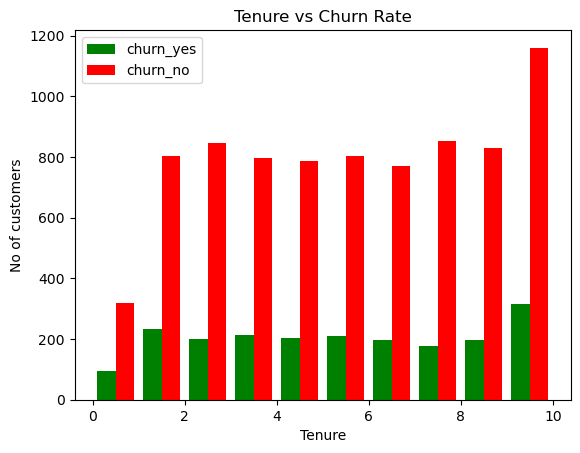

In [17]:
plt.hist([tenure_yes,tenure_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Tenure vs Churn Rate')
plt.legend()

# Observation From the graph, it is evident that for all tenure groups, the number of customers who have not churned ("churn_no") is significantly higher than those who have churned ("churn_yes"). The highest number of non-churned customers is seen at the 10th tenure group. Additionally, there is a noticeable spike in churn at the 0 tenure, indicating that a significant number of customers churn shortly after joining.

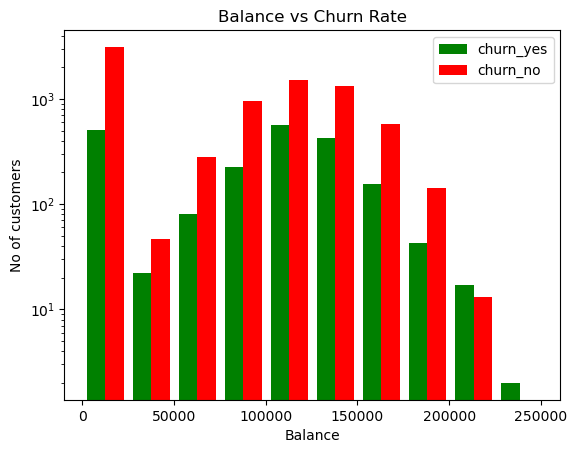

In [19]:
tenure_chur_no=df[df.Exited==0].Balance
tenure_chur_yes=df[df.Exited==1].Balance
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('Balance')
plt.ylabel('No of customers')
plt.title('Balance vs Churn Rate')
plt.yscale('log')
plt.legend()

# Observation: Customers having balance more than 200000 are tend to leave the bank

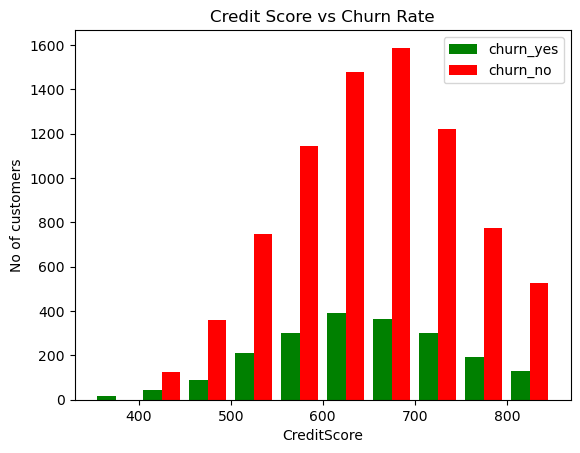

In [20]:
tenure_chur_no=df[df.Exited==0].CreditScore
tenure_chur_yes=df[df.Exited==1].CreditScore
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('CreditScore')
plt.ylabel('No of customers')
plt.title('Credit Score vs Churn Rate')
plt.legend()

# Observation:Although dataset is imbalanced still we can observe that customer who are having credit score less than 700 has more chance of leaving the bank and chance of leaving the bank reduces gradually.
#Also people who are staying in the bank and having high credit score are in less population in wole compared to other categories of credit scores, we can derive to more conculsions that they maynot like the outcomes of the bank or have found a better bank to have an account with more benifits.

# Feature Scaling and Engineering


In [21]:
df['Gender'] = df.Gender.replace({'Female':0,'Male':1})

In [23]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [27]:
df2 = pd.get_dummies(df,columns=['Geography'],drop_first=True,dtype='int')

In [28]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [32]:
# using minmaxscaler to scale 
from sklearn.preprocessing import MinMaxScaler
columns = ['CreditScore','Balance','EstimatedSalary','Age']
scale=MinMaxScaler()
for cols in columns:
    df2[cols]=scale.fit_transform(df2[[cols]])

In [37]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,1


# Model Building

In [34]:
X=df2.drop('Exited',axis=1)
y=df2['Exited']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
model=keras.Sequential([
     keras.layers.Dense(120,input_shape=(11,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

model.fit(X_train,y_train,epochs=50)



Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7914 - loss: 0.5170
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8009 - loss: 0.4609
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.4357
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8174 - loss: 0.4225
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.4175
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.3898
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8360 - loss: 0.3905
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.3771
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8418 - loss: 0.3764
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3670
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3633
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [44]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3404


[0.3420778214931488, 0.862500011920929]

In [45]:
y_pred=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [48]:
y_pred[10:15]

array([[0.9755156 ],
       [0.9437757 ],
       [0.8581447 ],
       [0.3633645 ],
       [0.00937543]], dtype=float32)

In [49]:
y_test[10:15]

2750    1
7487    1
5272    1
5653    0
3999    0
Name: Exited, dtype: int64

In [50]:
yp=[]
for i in y_pred:
    if i>0.5:
        yp.append(1)
    else :
        yp.append(0)

In [51]:
yp[10:15]

[1, 1, 1, 0, 0]

In [53]:
y_test[10:15]

2750    1
7487    1
5272    1
5653    0
3999    0
Name: Exited, dtype: int64

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
cf=confusion_matrix(yp,y_test)
cf

array([[1533,  201],
       [  74,  192]], dtype=int64)

<Axes: >

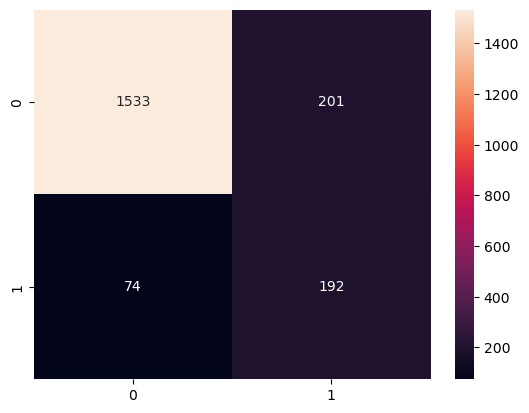

In [56]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [57]:
print(classification_report(yp,y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1734
           1       0.49      0.72      0.58       266

    accuracy                           0.86      2000
   macro avg       0.72      0.80      0.75      2000
weighted avg       0.89      0.86      0.87      2000



In [58]:
# Since f1-score for class 1 is less due to imabalanced dataset

In [85]:
def train_test(X,y):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
    return X_train,X_test,y_train,y_test

In [121]:
def ann_model(X_train,X_test,y_train,y_test):
    model=keras.Sequential([
     keras.layers.Dense(120,input_shape=(11,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    model.fit(X_train,y_train,epochs=50)
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_pred,y_test))

    

# Handle Imbalanced Dataset

# Undersampling

In [124]:
df2.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [125]:
count_0,count_1=df2.Exited.value_counts()

In [126]:
count_0,count_1

(7963, 2037)

In [127]:
df_0=df2[df2.Exited==0]
df_1=df2[df2.Exited==1]

In [128]:
df_0.shape,df_1.shape


((7963, 12), (2037, 12))

In [129]:
df_class_0_under=df_0.sample(count_1)
df_test_under=pd.concat([df_class_0_under,df_1],axis=0)
df_test_under.shape

(4074, 12)

In [140]:
df_test_under.Exited.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [130]:
X=df_test_under.drop('Exited',axis=1)
y=df_test_under['Exited']

In [131]:
X.shape,y.shape

((4074, 11), (4074,))

In [132]:
X_train,X_test,y_train,y_test=train_test(X,y)

In [133]:
ann_model(X_train,X_test,y_train,y_test)

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5078 - loss: 0.7448
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - loss: 0.6462
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - loss: 0.6161
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.5977
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - loss: 0.5917
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 0.5751
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7023 - loss: 0.5690
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7120 - loss: 0.5543
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 0.5334
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.5503
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7133 - loss: 0.5649
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [134]:
# Observation further decreses from 0.58 to 0.77

# Oversampling

In [135]:
count_0,count_1

(7963, 2037)

In [136]:
df_1_over=df_1.sample(count_0,replace=True)
df_test_over=pd.concat([df_1_over,df_0],axis=0)
df_test_over.shape

(15926, 12)

In [137]:
X=df_test_under.drop('Exited',axis=1)
y=df_test_under['Exited']

In [141]:
df_test_over.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [142]:
X_train,X_test,y_train,y_test=train_test(X,y)

In [143]:
ann_model(X_train,X_test,y_train,y_test)

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5786 - loss: 0.6783
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6308
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.6068
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 0.5946
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.5673
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5547
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7237 - loss: 0.5444
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7273 - loss: 0.5420
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7302 - loss: 0.5445
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5147
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7365 - loss: 0.5302
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [144]:
# Observation : f1-score from 0.58 to 0.79 

# Smote

In [152]:
X=df2.drop('Exited',axis=1)
y=df2['Exited']

In [153]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [154]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [155]:
X_train,X_test,y_train,y_test=train_test(X,y)

In [156]:
ann_model(X_train,X_test,y_train,y_test)

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7846 - loss: 0.5276
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.4589
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.4452
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.4324
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.4323
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.4151
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.3951
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.3856
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3674
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.3686
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.3618
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [157]:
#Observation f1-score from 0.58 to 0.60

# Ensemble

In [158]:
df2.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [160]:
X=df2.drop('Exited',axis=1)
y=df2['Exited']

In [161]:
X_train,X_test,y_train,y_test=train_test(X,y)

In [162]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [163]:
6370/1630

3.9079754601226995

In [167]:
df3=X_train.copy()
df3['Exited']=y_train

In [169]:
df3_class_0=df3[df3.Exited==0]
df3_class_1=df3[df3.Exited==1]

In [187]:
df3_class_0.shape,df3_class_1.shape

((6370, 12), (1630, 12))

In [188]:
def get_train_batch(df_major,df_minor,start,end):
    df_train=pd.concat([df_major[start:end],df_minor],axis=0)
    X_train=df_train.drop('Exited',axis=1)
    y_train=df_train['Exited']
    
    return X_train,y_train

In [189]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,0,1630)

In [190]:
def ann_model2(X_train,X_test,y_train,y_test):
    model=keras.Sequential([
     keras.layers.Dense(120,input_shape=(11,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    model.fit(X_train,y_train,epochs=50)
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_pred,y_test))
    return y_pred

In [191]:
y_pred1=ann_model2(X_train,X_test,y_train,y_test)

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5489 - loss: 0.6900
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - loss: 0.6465
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - loss: 0.6251
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6931 - loss: 0.5985
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7012 - loss: 0.5886
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7158 - loss: 0.5740
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 0.5615
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: 0.5574
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7318 - loss: 0.5412
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7377 - loss: 0.5277
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7401 - loss: 0.5304
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [192]:
y_pred1[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [193]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,1630,3260)

In [194]:
y_pred2=ann_model2(X_train,X_test,y_train,y_test)

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5863 - loss: 0.6721
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 0.6175
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - loss: 0.6035
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7081 - loss: 0.5737
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7241 - loss: 0.5547
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.5446
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7327 - loss: 0.5389
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 0.5387
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7484 - loss: 0.5157
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 0.5234
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - loss: 0.5117
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [195]:
y_pred2[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [198]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,3260,4890)

In [199]:
y_pred3=ann_model2(X_train,X_test,y_train,y_test)

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5548 - loss: 0.6877
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 0.6261
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - loss: 0.6081
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6886 - loss: 0.5954
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 0.5919
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7131 - loss: 0.5670
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7002 - loss: 0.5679
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7178 - loss: 0.5536
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7161 - loss: 0.5492
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7192 - loss: 0.5515
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.5470
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [204]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,4890,6520)

In [205]:
y_pred4=ann_model2(X_train,X_test,y_train,y_test)

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5701 - loss: 0.6833
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - loss: 0.6418
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 0.6094
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7005 - loss: 0.5852
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.5923
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 0.5518
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.5572
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.5452
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7412 - loss: 0.5312
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7271 - loss: 0.5368
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7581 - loss: 0.5162
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 0.5279


In [206]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]+y_pred4[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [207]:
y_pred_final[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [208]:
y_test[:5]

5702    0
3667    0
1617    0
5673    0
4272    0
Name: Exited, dtype: int64

In [209]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



# Above three improving f1-score(under,over and smote)